# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadira Furqani
- **Email:** nadirafurqani@gmail.com
- **ID Dicoding:** nadira_frqn

## Menentukan Pertanyaan Bisnis

- Apakah terdapat hubungan antara cuaca terhadap jumlah penyewa sepeda?
- Bagaimana kondisi penyewaan sepeda pada workingday, holiday, dan weekday?

## Import Semua Packages/Library yang Digunakan

In [16]:
# pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import streamlit as st

## Data Wrangling

### Gathering Data

In [38]:
day_data = pd.read_csv('/content/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
hour_data = pd.read_csv('/content/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil dimuat dengan data penyewaan sepeda per hari yaitu (day.csv)
- Dataset berhasil dimuat dengan data penyewaan sepeda per jam yaitu (hour.csv)

### Assessing Data

 **day_data**

In [40]:
# Mengecek info day_data
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak ada kesalahan yang signifikan dalam DataFrame ini kecuali untuk tipe data kolom dteday yang harus diubah menjadi tipe datetime.

In [41]:
# Mengecek missing values
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Pada tabel day_data tidak terdapat missing values sehingga tidak perlu adanya langkah untuk pembersihan missing values.

In [42]:
# Mengecek duplicate data
print("Jumlah duplicate data: ", day_data.duplicated().sum())

Jumlah duplicate data:  0


Insight:

- Pada tabel day_data tidak terdapat duplicate data maka dapat diartikan bahwa semua data bersifat unik.

In [43]:
# Nilai Statistik dari day_data
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight:

- Pada tabel day_data menunjukkan bahwa data memiliki yang menarik mengenai penggunaan sepeda, dengan pengaruh musim, kondisi cuaca, dan status keanggotaan terhadap jumlah penyewaan.

**hour_data**

In [44]:
# Mengecek info hour_data
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada kesalahan yang signifikan dalam DataFrame ini kecuali untuk tipe data kolom dteday yang harus diubah menjadi tipe datetime.

In [45]:
# Mengecek missing values
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada tabel hour_data tidak terdapat missing values sehingga tidak perlu adanya langkah untuk pembersihan missing values.

In [46]:
# Mengecek duplicate data
print("Jumlah duplicate data: ", day_data.duplicated().sum())

Jumlah duplicate data:  0


Insight:
- Pada tabel hour_data tidak terdapat duplicate data maka dapat diartikan bahwa semua data bersifat unik.

In [47]:
# Nilai Statistik dari hour_data
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:

- Pada tabel hour_data menunjukkan bahwa data memiliki yang menarik mengenai penggunaan sepeda, dengan pengaruh musim, kondisi cuaca, dan status keanggotaan terhadap jumlah penyewaan.

### Cleaning Data

In [48]:
# Mengubah angka menjadi keterangan
day_data['weekday'] = day_data['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thurday', 5: 'Friday', 6: 'Saturday'
})
day_data['weathersit'] = day_data['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [30]:
# Mengubah tipe data ke datetime
day_data['dteday'] = pd.to_datetime(day_data.dteday)

day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.5+ KB


Insight:

- Pada tabel day_data terdapat perubahan tipe data dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [50]:
# Mengelompokkan penyewa sepeda berdasarkan cuaca
day_data.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

**Insight:**
- Berdasarkan hasil diatas disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca sedang cerah atau mendung. Namun, ketika cuaca bersalju sangat sedikit yang menyewa sepeda dan ketika cuaca sedang sangat buruk tidak ada yang menyewa sepeda.


In [51]:
# Mengelompokkan penyewa sepeda berdasarkan hasi-hari libur (holiday)
day_data.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Insight:**
- Berdasarkan hasil diatas disimpulkan bahwa para penyewa sepeda cenderung lebih menyukai menyewa sepeda ketika hari-hari biasa bukan pada hari-hari libur.

In [52]:
# Membandingkan penyewa sepeda pada saat hari biasa dengan akhir pekan
day_data.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thurday    7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

**Insight:**
- Berdasarkan hasil diatas disimpulkan bahwa urutan dengan rata-rata jumlah penyewa yang paling besar terdapat pada hari jumat (friday) dan jumlah penyewa paling kecil terdapat pada hari minggu (sunday).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat hubungan antara cuaca terhadap jumlah penyewa sepeda?


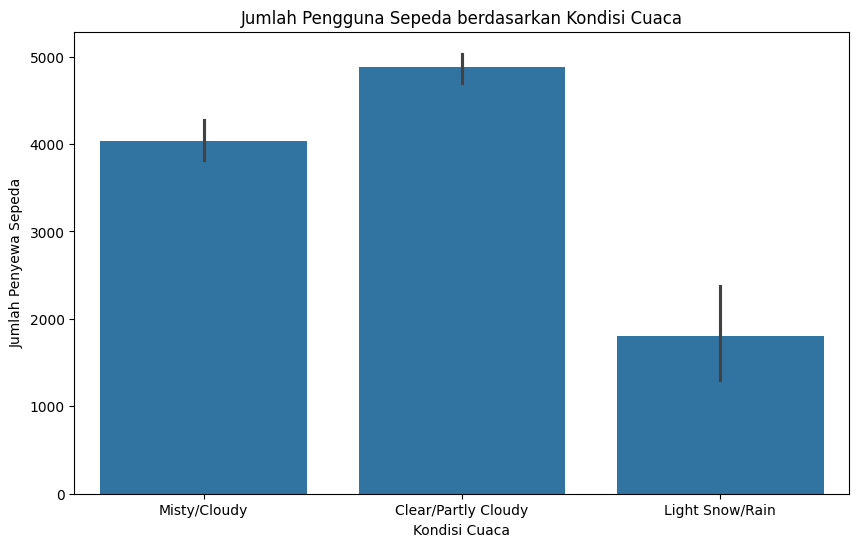

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_data)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

**Insight:**
- Terdapat hubungan antara cuaca dengan jumlah penyewa sepeda dengan kondisi clear/partly cloudy menjadi peminat paling banyak, dan diikuti oleh kondisi misty/cloudy serta kondisi light snow/rain menjadi kondisi dengan penyewa sepeda paling sedikit.

### Pertanyaan 2: Bagaimana kondisi penyewaan sepeda pada holiday dan weekday?

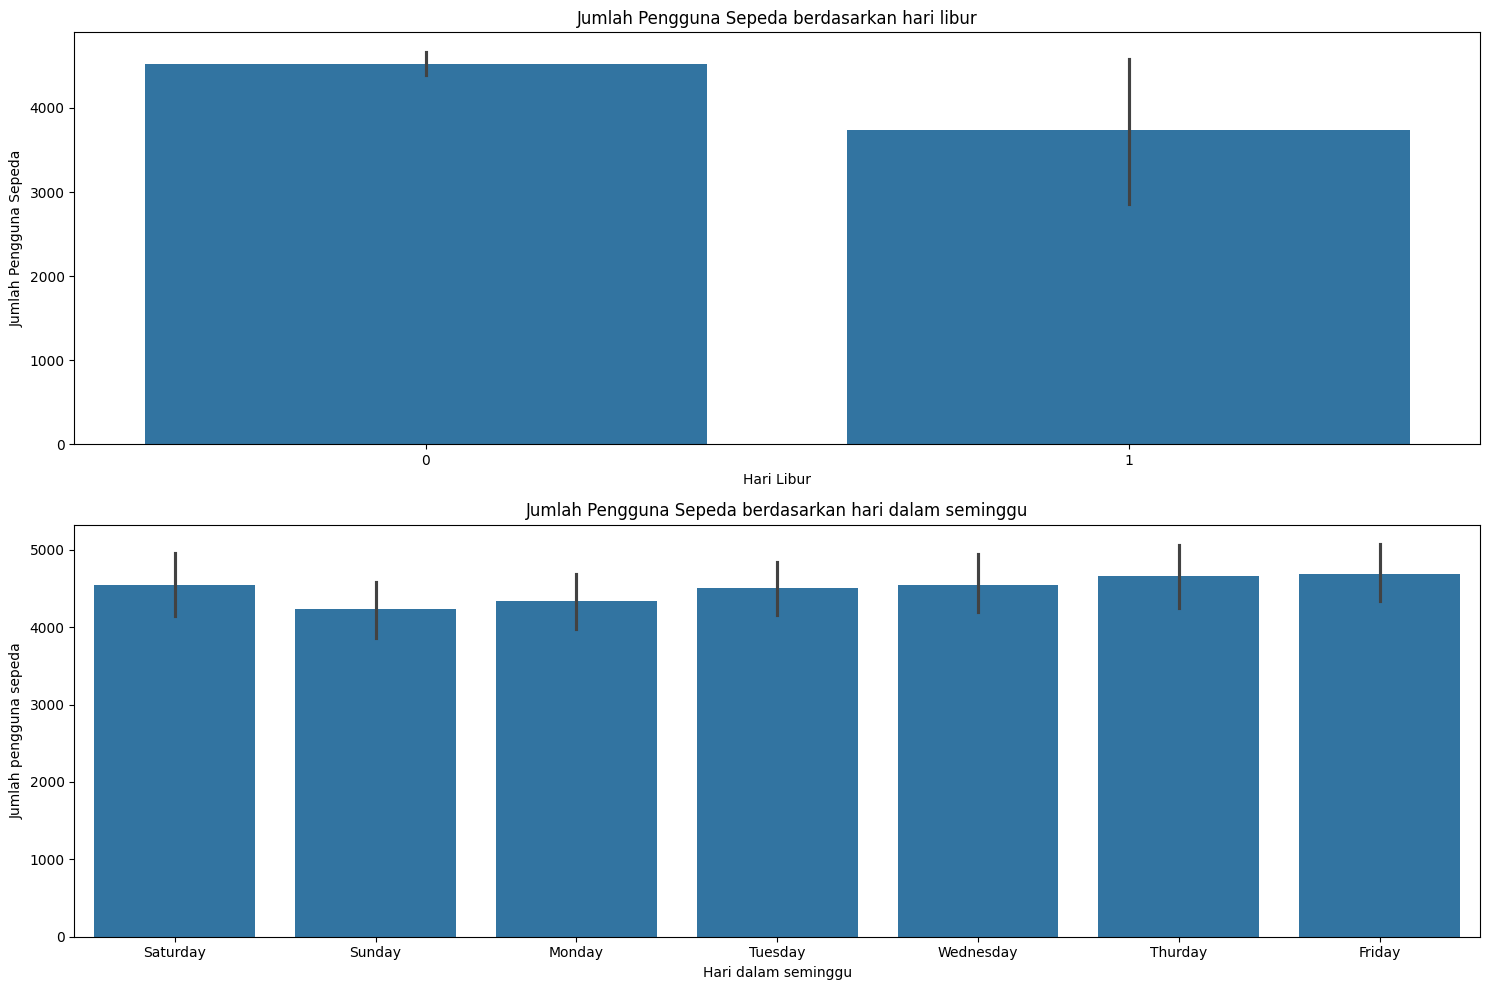

In [54]:
fig, axes = plt.subplots(nrows=2, figsize=(15,10))
# Holiday
sns.barplot(x='holiday', y='cnt',data=day_data, ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan hari libur')
axes[0].set_xlabel('Hari Libur')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Weekday
sns.barplot(x='weekday', y='cnt', data=day_data, ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan hari dalam seminggu')
axes[1].set_xlabel('Hari dalam seminggu')
axes[1].set_ylabel('Jumlah pengguna sepeda')

plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewa sepeda lebih banyak pada hari biasa (weekday) daripada hari libur (holiday)
- Jumlah penyewa sepeda yang menempati posisi pertama pada hari jumat dengan jumlah terbanyak dan hari minggu menjadi hari dengan jumlah penyewa paling sedikit.

# Analisis Lanjutan (Opsional)

In [55]:
df_rfm = day_data.copy()
df_rfm['Recency'] = (pd.to_datetime(df_rfm['dteday']).max() - pd.to_datetime(df_rfm['dteday'])).dt.days
df_rfm['Frequency'] = df_rfm['cnt']
df_rfm['Monetary'] = df_rfm['cnt'] * df_rfm['registered']

print(df_rfm[['Recency', 'Frequency', 'Monetary']].head())

   Recency  Frequency  Monetary
0      730        985    644190
1      729        801    536670
2      728       1349   1657921
3      727       1562   2271148
4      726       1600   2428800


Hasil RFM:
- Recency: Menunjukkan jumlah hari sejak penyewaan terakhir, nilai lebih rendah berarti pelanggan lebih baru. Contoh: Pelanggan dengan Recency 730 hari belum menyewa dalam waktu lama.
- Frequency: Total penyewaan pelanggan, nilai lebih tinggi menunjukkan penggunaan lebih sering. Contoh: Pelanggan dengan Frequency 1600 telah menyewa sepeda 1600 kali.
- Monetary: Total pengeluaran pelanggan untuk penyewaan, nilai lebih tinggi menunjukkan pelanggan yang lebih bernilai. Contoh: Pelanggan dengan Monetary 2.428.800 telah menghabiskan 2.428.800 untuk penyewaan.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan analisis yang dilakukan, terdapat hubungan yang signifikan antara kondisi cuaca dengan jumlah penyewa sepeda. Data ini menunjukkan berbagai kondisi cuaca yang memperngaruhi minat masyarakat dalam menyewa sepeda. Hal inilah yang mengindikasikan bahwa cuaca dapat menjadi faktor penting yang perlu dipertimbangkan dalam merencanakan penawaran layanan penyewaan sepeda

- Conclution pertanyaan 2: Berdasarkan analisis yang dilakukan, terlihat bahwa jumlah penyewa sepeda lebih tinggi pada hari biasa (weekday) dibandingkan dengan hari libur (holiday). Hal ini menunjukkan bahwa aktivitas penyewaan sepeda lebih banyak terjadi pada hari kerja karena penggunaan sepeda sebagai moda transportasi harian.